In [1]:
# 导入需要的数据包
from sklearn.datasets import load_iris 
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image, display

#load_iris是sklearn的测试数据，在这用来做决策树演示
iris = load_iris()

#建立最大深度为2的决策树，并用测试数据来训练这颗树
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(iris.data, iris.target)

#假设我们要预测第10个样本的值
sample_idx = 111

/opt/conda/envs/python3new/lib/python3.6/site-packages/sklearn/externals/joblib/_multiprocessing_helpers.py:28: UserWarning: [Errno 30] Read-only file system.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
#第10个样本的各个属性，在这可以看到有4个属性
iris.data[sample_idx]

array([ 6.4,  2.7,  5.3,  1.9])

In [3]:
#预测，结果是第2类
prediction = clf.predict(iris.data[sample_idx:sample_idx+1])
prediction

array([2])

In [4]:
#真实值也是第2类，结果正确
truth = iris.target[sample_idx]
truth

2

In [5]:
#用于观察结果的可能性，由图可知因为这个项属于0,1,2的概率分别为0,0.022,0.978，属于2类的概率最大，决策树把他归入2类
class_probabilities = clf.predict_proba(iris.data[sample_idx:sample_idx+1])
class_probabilities

array([[ 0.        ,  0.02173913,  0.97826087]])

In [6]:
#用于展示不同因子的重要性，此处可知第4个因子决定了这一判断，重要性为100%，其他因子未参与判断
clf.feature_importances_

array([ 0.,  0.,  0.,  1.])

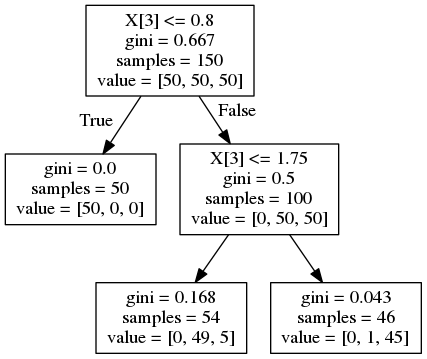

In [7]:
#建立缓存变量f
f = StringIO()
#把决策树clf的图形结果输出，仍进缓存f中
tree.export_graphviz(clf, out_file=f)
# 取出缓存，画图
graph = pydotplus.graph_from_dot_data(f.getvalue())
# 将图片保存进本地文件中
graph.write_png("dtree2.png")
#画出决策树，也可以用标注的代码画出保存在本地的png图片
#display(Image(filename="dtree2.png"))
display(Image(graph.create_png()))